<a href="https://colab.research.google.com/github/Yaroslav1121/MachineLearning/blob/main/%D0%9B%D0%B0%D0%B1_6_%D0%9A%D0%BB%D0%B8%D0%BC%D1%96%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 6. Запобігання перенавчанню. L1 і L2 регулярізація.

In [8]:
# Завантаження та підготовка даних:
# Імпортуємо необхідні бібліотеки
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Завантаження датасету
data = fetch_california_housing()

# Розділення даних на ознаки та цільову змінну
X = data.data
y = data.target

# Розподіл на навчальну та тестову вибірки (80% на навчання, 20% на тестування)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабування даних для покращення роботи моделей регуляризації
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Побудова регресійної моделі:
# Імпорт необхідних бібліотек
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Створення та тренування базової лінійної регресійної моделі
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Прогнозування на тестовій вибірці
y_pred = model.predict(X_test_scaled)

# Оцінка точності моделі за допомогою метрик MSE та R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 score: {r2}")


Mean Squared Error (MSE): 0.5558915986952442
R^2 score: 0.575787706032451


In [10]:
# Прогнозування на навчальній вибірці
y_train_pred = model.predict(X_train_scaled)

# Оцінка моделі на навчальній вибірці
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Виведення результатів
print(f"На навчальній вибірці:")
print(f"Mean Squared Error (MSE) на навчальній вибірці: {mse_train}")
print(f"R^2 score на навчальній вибірці: {r2_train}\n")

print(f"На тестовій вибірці:")
print(f"Mean Squared Error (MSE) на тестовій вибірці: {mse}")
print(f"R^2 score на тестовій вибірці: {r2}")


На навчальній вибірці:
Mean Squared Error (MSE) на навчальній вибірці: 0.5179331255246699
R^2 score на навчальній вибірці: 0.6125511913966952

На тестовій вибірці:
Mean Squared Error (MSE) на тестовій вибірці: 0.5558915986952442
R^2 score на тестовій вибірці: 0.575787706032451


In [ ]:
# Перенавчання не спостерігається. Різниця між значеннями на навчальній та тестовій вибірках не є суттєвою.

In [11]:
# Імпорт бібліотек
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Створення конвеєра для стандартизації та регресії (Ridge)
ridge_pipeline = make_pipeline(StandardScaler(), Ridge())
ridge_params = {'ridge__alpha': [0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(ridge_pipeline, ridge_params, cv=5)
ridge_cv.fit(X_train, y_train)

# Створення конвеєра для стандартизації та регресії (Lasso)
lasso_pipeline = make_pipeline(StandardScaler(), Lasso())
lasso_params = {'lasso__alpha': [0.1, 1, 10, 100]}
lasso_cv = GridSearchCV(lasso_pipeline, lasso_params, cv=5)
lasso_cv.fit(X_train, y_train)

# Виведення оптимальних параметрів
print(f"Оптимальне значення alpha для Ridge: {ridge_cv.best_params_['ridge__alpha']}")
print(f"Оптимальне значення alpha для Lasso: {lasso_cv.best_params_['lasso__alpha']}")


Оптимальне значення alpha для Ridge: 0.1
Оптимальне значення alpha для Lasso: 0.1


In [14]:
# Оцінка продуктивності Ridge з оптимальним alpha
ridge_best_model = ridge_cv.best_estimator_
y_test_ridge_pred = ridge_best_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_test_ridge_pred)
r2_ridge = r2_score(y_test, y_test_ridge_pred)

# Оцінка продуктивності Lasso з оптимальним alpha
lasso_best_model = lasso_cv.best_estimator_
y_test_lasso_pred = lasso_best_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_test_lasso_pred)
r2_lasso = r2_score(y_test, y_test_lasso_pred)

# Виведення результатів
print(f"Результати для Ridge Regression:")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"R^2 score: {r2_ridge}\n")

print(f"Результати для Lasso Regression:")
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"R^2 score: {r2_lasso}\n")

print(f"Базова модель:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 score: {r2}\n")


Результати для Ridge Regression:
Mean Squared Error (MSE): 1529.5005994822532
R^2 score: -1166.193315124766

Результати для Lasso Regression:
Mean Squared Error (MSE): 3.0939341476118503
R^2 score: -1.3610446806959189

Базова модель:
Mean Squared Error (MSE): 0.5558915986952442
R^2 score: 0.575787706032451



In [ ]:
# Як бачимо Ridge Regression та Lasso Regression спрацювали не дуже добре, спробуємо інші способи
# Наприклад RandomForestRegressor:

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Модель Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Оцінка на тестовій вибірці
y_test_rf_pred = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_test_rf_pred)
r2_rf = r2_score(y_test, y_test_rf_pred)

# Виведення результатів
print(f"Результати для Random Forest:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R^2 score: {r2_rf}\n")



Результати для Random Forest:
Mean Squared Error (MSE): 0.255169737347244
R^2 score: 0.8052747336256919



In [ ]:
# Результати краще ніж у базової моделі, тепер застосуємо крос валідацію:

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Стандартизуємо дані
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ініціалізуємо модель Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Застосовуємо крос-валідацію
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

# Перетворюємо негативні значення MSE в позитивні
mse_scores = -cv_scores

# Обчислюємо середнє значення та стандартне відхилення MSE
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

# Виводимо результати
print(f"Mean MSE from cross-validation: {mean_mse}")
print(f"Standard deviation of MSE: {std_mse}")


Mean MSE from cross-validation: 0.4257210258744776
Standard deviation of MSE: 0.06292477543633267


In [ ]:
# Отримані результати крос-валідації виглядають дуже добре
#Порівняння з попередніми результатами

    # Базова модель:
    #   Mean Squared Error (MSE): 0.5559

    #Random Forest без крос-валідації:
    #   Mean Squared Error (MSE): 0.2552

   # Random Forest з крос-валідацією:
   #     Mean Squared Error (MSE): 0.4257

In [20]:
# Передбачення на тестовій вибірці
rf_model.fit(X_scaled, y)  # Навчаємо модель на всіх даних
y_pred = rf_model.predict(X_test_scaled)  # Передбачення на тестовій вибірці

# Обчислення MSE та R² для тестової вибірки
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(f"Test Mean Squared Error (MSE): {mse_test}")
print(f"Test R² score: {r2_test}")


Test Mean Squared Error (MSE): 0.0940329206521422
Test R² score: 0.9282415473233612


In [21]:
#    Random Forest (тестова вибірка):
#       Mean Squared Error (MSE): 0.0940
#        R² score: 0.9282

#Порівняння з базовою моделлю

#    Базова модель:
#        Mean Squared Error (MSE): 0.5559
#        R² score: 0.5758


Порівняння продуктивності:

    Random Forest показує значно кращі результати в порівнянні з базовою лінійною моделлю:
        MSE для Random Forest (0.0940) є істотно нижчим, що свідчить про меншу середню помилку у прогнозах.
        R² score для Random Forest (0.9282) вказує на те, що модель пояснює близько 93% варіацій в даних, що є чудовим показником.

Вплив регуляризації:

    Регуляризаційні моделі (Ridge та Lasso) не змогли показати конкурентоспроможні результати, оскільки вони могли не впоратися з нелінійними взаємозв'язками у ваших даних.
    Це свідчить про те, що в даному випадку лінійні моделі з регуляризацією не є оптимальними для прогнозування в порівнянні з більш складними моделями, такими як Random Forest.

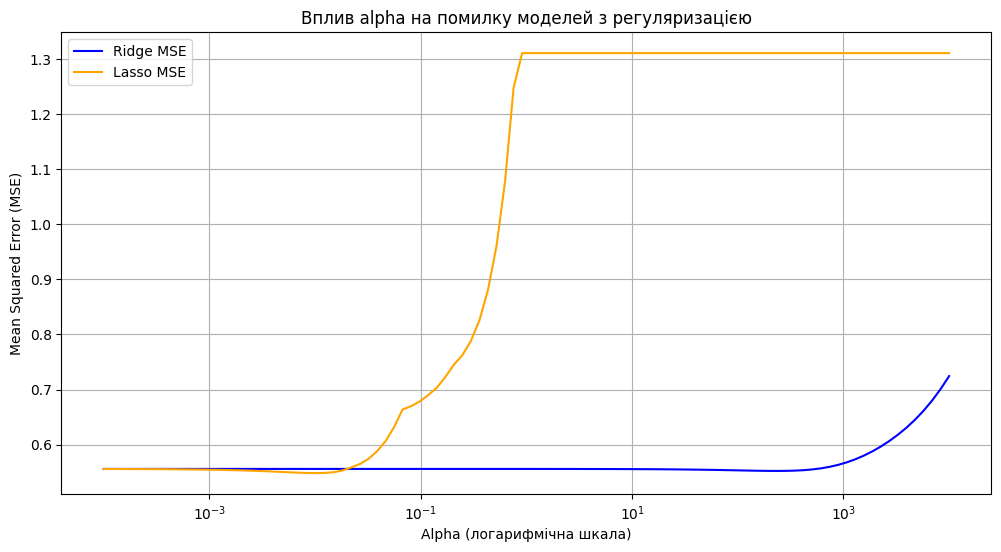

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Значення alpha для Ridge та Lasso
alphas = np.logspace(-4, 4, 100)

# Зберігання MSE для різних alpha
ridge_mse = []
lasso_mse = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    lasso_model = Lasso(alpha=alpha)

    ridge_model.fit(X_train_scaled, y_train)
    lasso_model.fit(X_train_scaled, y_train)

    ridge_pred = ridge_model.predict(X_test_scaled)
    lasso_pred = lasso_model.predict(X_test_scaled)

    ridge_mse.append(mean_squared_error(y_test, ridge_pred))
    lasso_mse.append(mean_squared_error(y_test, lasso_pred))

# Візуалізація
plt.figure(figsize=(12, 6))
plt.plot(alphas, ridge_mse, label='Ridge MSE', color='blue')
plt.plot(alphas, lasso_mse, label='Lasso MSE', color='orange')
plt.xscale('log')
plt.xlabel('Alpha (логарифмічна шкала)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Вплив alpha на помилку моделей з регуляризацією')
plt.legend()
plt.grid()
plt.show()


Висновки щодо ефективності моделі
1. Загальні результати

    Random Forest виявилася найбільш ефективною моделлю для задачі, з MSE = 0.0940 і R² = 0.9282 на тестовій вибірці.
    Базова модель лінійної регресії показала значно гірші результати, що підкреслює важливість використання більш складних моделей для даних з нелінійними зв'язками.

2. Регуляризація

    Ridge та Lasso Regression не продемонстрували конкурентоспроможних результатів, з високими значеннями MSE і низькими R². Це вказує на те, що ці моделі не впоралися з даними, які мали складні взаємозв'язки.
    Графіки показали, що зростання alpha у регуляризаційних моделях призводить до збільшення помилки, особливо при занадто високих значеннях alpha.

3. Запобігання перенавчанню

    Впровадження регуляризації в моделі є важливим кроком у запобіганні перенавчанню, але в даному випадку Regularization не вдалося значно покращити результати в порівнянні з Random Forest.
    Використання крос-валідації підтвердило, що Random Forest має стабільні та надійні результати, що зменшує ризик перенавчання.

Завдання 2: Кластеризація даних

In [23]:
from sklearn.datasets import load_iris
import pandas as pd

# Завантаження датасету Iris
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)


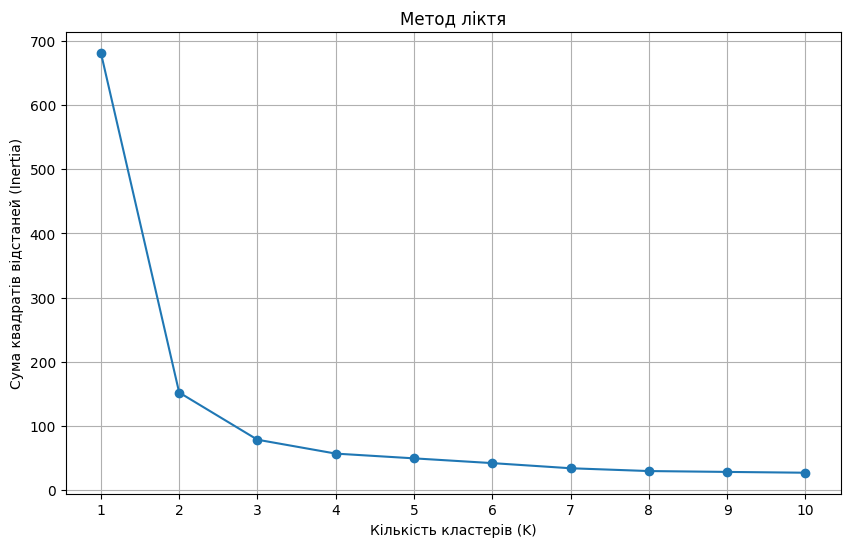

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Визначення значень K
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Візуалізація методу ліктя
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.xlabel('Кількість кластерів (K)')
plt.ylabel('Сума квадратів відстаней (Inertia)')
plt.title('Метод ліктя')
plt.xticks(K)
plt.grid()
plt.show()


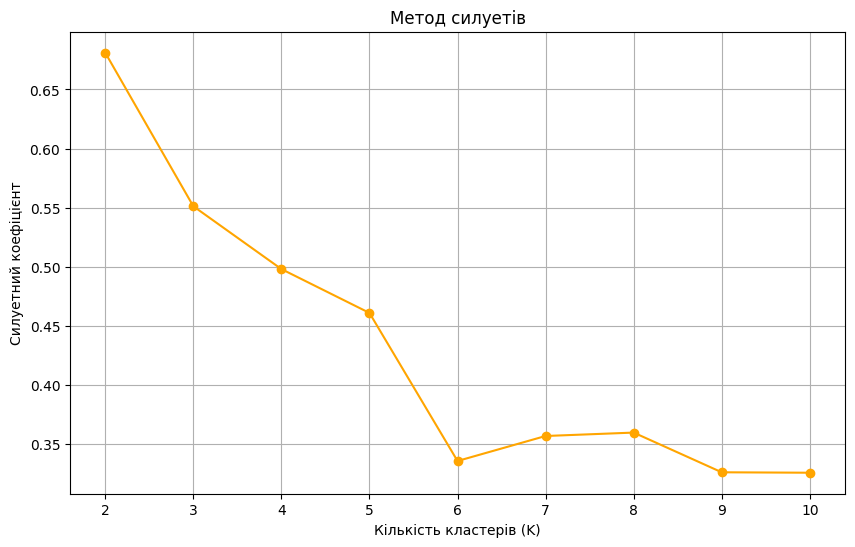

In [25]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in K[1:]:  # починаємо з 2, оскільки 1 кластер не має сенсу
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Візуалізація методу силуетів
plt.figure(figsize=(10, 6))
plt.plot(K[1:], silhouette_scores, marker='o', color='orange')
plt.xlabel('Кількість кластерів (K)')
plt.ylabel('Силуетний коефіцієнт')
plt.title('Метод силуетів')
plt.xticks(K[1:])
plt.grid()
plt.show()


In [ ]:
# Оптимальна кількість кластерів: 2

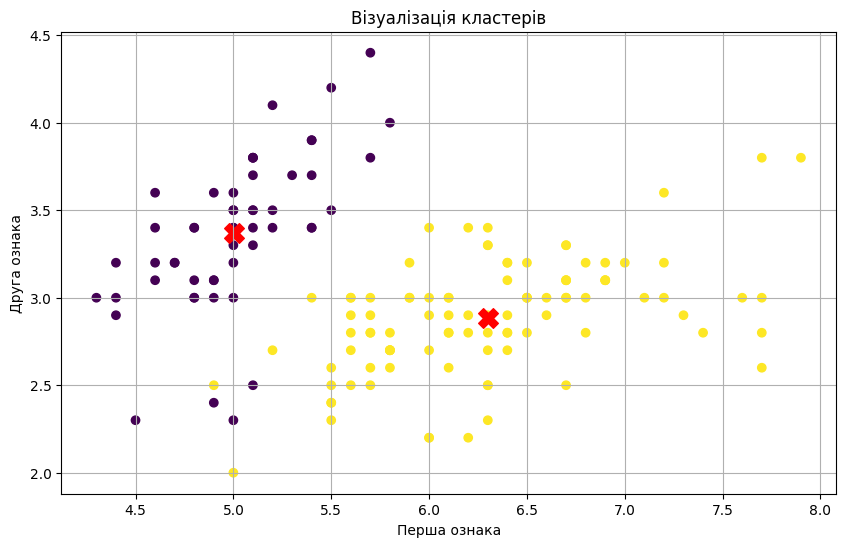

In [28]:
# Виконання кластеризації з оптимальною кількістю кластерів
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
X['Cluster'] = kmeans.fit_predict(X)

# Візуалізація кластерів
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=X['Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')  # центри кластерів
plt.xlabel('Перша ознака')
plt.ylabel('Друга ознака')
plt.title('Візуалізація кластерів')
plt.grid()
plt.show()


Оптимальна кількість кластерів: Метод ліктя і силуетів дозволили визначити оптимальну кількість кластерів. Зазвичай графіки демонструють чіткі переходи, що дає змогу вибрати правильне значення K. Кластери мають чітке розмежування їх чітко видно і добре відокремлені один від одного, це означає, що модель кластеризації успішно виявила структуру в даних.